<h2>Multiple Control Constructions</h2>

[Watch Lecture](https://youtu.be/eoFJdS5BwkA)

Remember that when appying CNOT gate, NOT operator is applied to the target qubit if the control qubit is in state $\ket{1}$:

$$ CNOT= \mymatrix{cc|cc}{\blackbit{1} & 0 & 0 & 0 \\ 0 & \blackbit{1} & 0 & 0 \\ \hline 0 & 0 & 0 & \bluebit{1} \\  0 & 0 & \bluebit{1} & 0} . $$

How can we obtain the following operator, in which the NOT operator is applied to the target qubit if the control qubit is in state $ \ket{0} $?

$$ C_0NOT = \mymatrix{cc|cc}{0 & \bluebit{1} & 0 & 0 \\ \bluebit{1} & 0 & 0 & 0 \\ \hline 0 & 0 & \blackbit{1} & 0 \\  0 & 0 & 0 & \blackbit{1}} . $$

As also mentioned in the notebook [Operators on Multiple Bits](B19_Operators_on_Multiple_Bits.ipynb), we can apply a $ NOT $ operator on the control bit before applying $ CNOT $ operator so that the $ NOT $ operator is applied to the target qubit when the control qubit has been in state $ \ket{0} $. To recover the previous value of the control qubit, we apply the $ NOT $ operator once more after the $ CNOT $ operator. In short:
<ul>
    <li>apply $ NOT $ operator to the control qubit,</li>
    <li>apply $ CNOT $ operator, and,</li>
    <li>apply $ NOT $ operator to the control qubit.</li>
</ul>

We can implement this idea in Qiskit as follows.

CNOT(0) = 
0.0  1.0  0.0  0.0  
1.0  0.0  0.0  0.0  
0.0  0.0  1.0  0.0  
0.0  0.0  0.0  1.0  


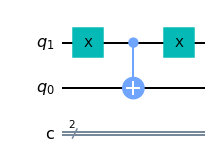

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

q = QuantumRegister(2, "q")
c = ClassicalRegister(2, "c")

qc = QuantumCircuit(q,c)

qc.x(q[1])

qc.cx(q[1],q[0])

# Returning control qubit to the initial state
qc.x(q[1])

job = execute(qc,Aer.get_backend('unitary_simulator'), shots = 1)
U=job.result().get_unitary(qc,decimals=3)

print("CNOT(0) = ")
for row in U:
    s = ""
    for value in row:
        s = s + str(round(value.real,2)) + "  "
    print(s)

qc.draw(output="mpl", reverse_bits=True)

By using this trick, more complex conditional operators can be implemented.

<h3>CCNOT</h3>

Now we introduce $ CCNOT $ gate: **controlled-controlled-not operator** ([Toffoli gate](https://en.wikipedia.org/wiki/Toffoli_gate)), which is controlled by two qubits. The implementation of $CCNOT$ gate in Qiskit is as follows:

    circuit.ccx(control-qubit1,control-qubit2,target-qubit)

That is, $ NOT $ operator is applied to the target qubit when both control qubits are in state $\ket{1}$. Its matrix representation is as follows:

$$ CCNOT = \mymatrix{cc|cc|cc|cc}{\blackbit{1} & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & \blackbit{1} & 0 & 0 & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & \blackbit{1} & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & \blackbit{1} & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & \blackbit{1} & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & \blackbit{1} & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & 0 & 0 & 0 & \bluebit{1} \\ 0 & 0 & 0 & 0 & 0 & 0 & \bluebit{1} & 0}. $$

<a id="task1"></a>
<h3> Task 1 </h3>

Implement each of the following operators in Qiskit by using three qubits. Verify your implementation by using "unitary_simulator" backend. <br><br>

<font size="-2">
$$
    C_0C_0NOT = \mymatrix{cc|cc|cc|cc}{0 & \bluebit{1} & 0 & 0 & 0 & 0 & 0 & 0 \\ \bluebit{1} & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & \blackbit{1} & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & \blackbit{1} & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & \blackbit{1} & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & \blackbit{1} & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & 0 & 0 & \blackbit{1} & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & \blackbit{1}}, ~~
    C_0C_1NOT = \mymatrix{cc|cc|cc|cc}{ \blackbit{1} & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & \blackbit{1} & 0 & 0 & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & 0 & \bluebit{1}  & 0 & 0 & 0 & 0 \\ 0 & 0 & \bluebit{1}  & 0 & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & \blackbit{1} & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & \blackbit{1} & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & 0 & 0 & \blackbit{1} & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & \blackbit{1}}, ~~ \mbox{and} ~~
    C_1C_0NOT = \mymatrix{cc|cc|cc|cc}{\blackbit{1} & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & \blackbit{1} & 0 & 0 & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & \blackbit{1} & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & \blackbit{1} & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & 0 & \bluebit{1} & 0 & 0 \\ 0 & 0 & 0 & 0 & \bluebit{1} & 0 & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & 0 & 0 & \blackbit{1} & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & \blackbit{1}}.   
$$
    </font>

#### Implementation of $ C_0C_0NOT $ operator

CCNOT(00) = 
0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  


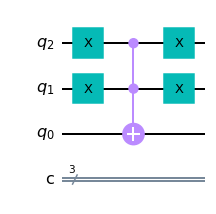

In [2]:
#
# your solution is here
#
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

q =  QuantumRegister(3,"q")
c = ClassicalRegister(3,"c")

qc = QuantumCircuit(q,c)

qc.x(q[2])
qc.x(q[1])
qc.ccx(q[2],q[1],q[0])
qc.x(q[2])
qc.x(q[1])

job = execute(qc,Aer.get_backend('unitary_simulator'), shots = 1)
U=job.result().get_unitary(qc,decimals=3)

print("CCNOT(00) = ")
for row in U:
    s = ""
    for value in row:
        s = s + str(round(value.real,2)) + "  "
    print(s)



qc.draw(output="mpl",reverse_bits=True)

#### Implementation of $ C_0C_1NOT $ operator

CCNOT(01) = 
1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  


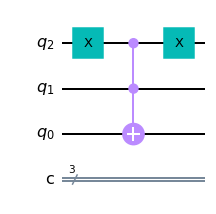

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

q =  QuantumRegister(3,"q")
c = ClassicalRegister(3,"c")

qc = QuantumCircuit(q,c)

qc.x(q[2])
qc.ccx(q[2],q[1],q[0])
qc.x(q[2])

job = execute(qc,Aer.get_backend('unitary_simulator'), shots = 1)
U=job.result().get_unitary(qc,decimals=3)

print("CCNOT(01) = ")
for row in U:
    s = ""
    for value in row:
        s = s + str(round(value.real,2)) + "  "
    print(s)



qc.draw(output="mpl",reverse_bits=True)

#### Implementation of $ C_1C_0NOT $ operator

CCNOT(10) = 
1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  


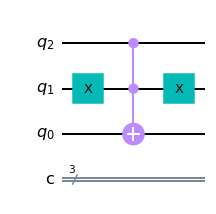

In [4]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

q =  QuantumRegister(3,"q")
c = ClassicalRegister(3,"c")

qc = QuantumCircuit(q,c)

qc.x(q[1])
qc.ccx(q[2],q[1],q[0])
qc.x(q[1])

job = execute(qc,Aer.get_backend('unitary_simulator'), shots = 1)
U=job.result().get_unitary(qc,decimals=3)

print("CCNOT(10) = ")
for row in U:
    s = ""
    for value in row:
        s = s + str(round(value.real,2)) + "  "
    print(s)



qc.draw(output="mpl",reverse_bits=True)

<h3>More controls</h3>

Here we present basic methods on how to implement $ NOT $ gates controlled by more than two qubits by using $CNOT$, $ CCNOT $, and some ancilla (auxiliary) qubits. 

*(Note that Qiskit has a method called "mct" to implement such gates. Another multiple-controlled operator in Qiskit is "mcrz".)*

#### Implementation of CCCNOT gate

We give the implementation of $ CCCNOT $ gate: $NOT$ operator is applied to target qubit when the control qubits are in state $ \ket{111} $. This gate requires 4 qubits. We also use an auxiliary qubit. 

Our qubits are $ q_{aux}, q_3, q_2, q_1, q_0 $, and the auxiliary qubit $q_{aux}$ should be in state $\ket{0}$ after each use. The implementation of the $ CCCNOT $ gate in Qiskit is given below. The short explanations are given as comments.

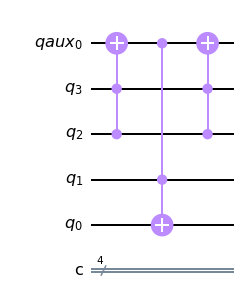

In [5]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qaux = QuantumRegister(1,"qaux")
q = QuantumRegister(4,"q")
c = ClassicalRegister(4,"c")

qc = QuantumCircuit(q,qaux,c)

# step 1: set qaux to |1> if both q3 and q2 are in |1>
qc.ccx(q[3],q[2],qaux[0])

# step 2: apply NOT gate to q0 if both qaux and q1 are in |1>
qc.ccx(qaux[0],q[1],q[0])

# step 3: set qaux to |0> if both q3 and q2 are in |1> by reversing the affect of step 1
qc.ccx(q[3],q[2],qaux[0])

qc.draw(output="mpl",reverse_bits=True)

Now, we execute this circuit on every possible inputs and verify the correctness of the implementation experimentally.

In [6]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_inputs=[]
for q3 in ['0','1']:
    for q2 in ['0','1']:
        for q1 in ['0','1']:
            for q0 in ['0','1']:
                all_inputs.append(q3+q2+q1+q0)
# print(all_inputs)                                  

print("input --> output")
for the_input in all_inputs:
    # create the circuit
    qaux = QuantumRegister(1,"qaux")
    q = QuantumRegister(4,"q")
    c = ClassicalRegister(4,"c")
    qc = QuantumCircuit(q,qaux,c)
    # set the initial value of the circuit w.r.t. the input
    if the_input[0] =='1': qc.x(q[3])
    if the_input[1] =='1': qc.x(q[2])
    if the_input[2] =='1': qc.x(q[1])
    if the_input[3] =='1': qc.x(q[0])
    # implement the CCNOT gates
    qc.ccx(q[3],q[2],qaux[0])
    qc.ccx(qaux[0],q[1],q[0])
    qc.ccx(q[3],q[2],qaux[0])
    # measure the main quantum register 
    qc.measure(q,c)
    # execute the circuit
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1)
    counts = job.result().get_counts(qc)
    for key in counts: the_output = key
    printed_str = the_input[0:3]+" "+the_input[3]+" --> "+the_output[0:3]+" "+the_output[3]
    if (the_input!=the_output): printed_str = printed_str + " the output is different than the input"
    print(printed_str)

input --> output
000 0 --> 000 0
000 1 --> 000 1
001 0 --> 001 0
001 1 --> 001 1
010 0 --> 010 0
010 1 --> 010 1
011 0 --> 011 0
011 1 --> 011 1
100 0 --> 100 0
100 1 --> 100 1
101 0 --> 101 0
101 1 --> 101 1
110 0 --> 110 0
110 1 --> 110 1
111 0 --> 111 1 the output is different than the input
111 1 --> 111 0 the output is different than the input


<h3>Task 2</h3>

Provide an implementation of the NOT operator controlled by 4 qubits ($CCCCNOT$) in Qiskit. Verify its correctness by executing your solution on all possible inputs. (See the above example)

*You may use two auxiliary qubits.*

#### Desinging the operator

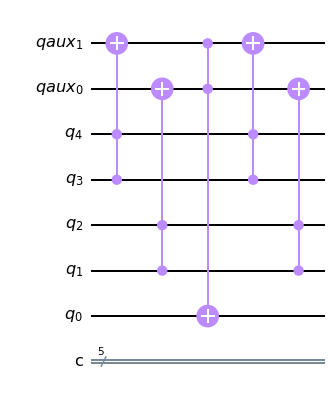

In [7]:
#
# your solution is here
#
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qaux = QuantumRegister(2,"qaux")
q = QuantumRegister(5,"q")
c = ClassicalRegister(5,"c")
qc = QuantumCircuit(q,qaux,c)

qc.ccx(q[4],q[3],qaux[1])
qc.ccx(q[2],q[1],qaux[0])
qc.ccx(qaux[1],qaux[0],q[0])
qc.ccx(q[4],q[3],qaux[1])
qc.ccx(q[2],q[1],qaux[0])

qc.draw(output="mpl",reverse_bits=True)

#### Executing this circuit on every possible inputs and verify the correctness of the implementation experimentially.

In [8]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_inputs=[]
for q4 in ['0','1']: 
    for q3 in ['0','1']:
        for q2 in ['0','1']:
            for q1 in ['0','1']:
                for q0 in ['0','1']:
                    all_inputs.append(q4+q3+q2+q1+q0)
#print(all_inputs)  

print("input --> output")
for the_input in all_inputs:
    # create the circuit
    qaux = QuantumRegister(2,"qaux")
    q = QuantumRegister(5,"q")
    c = ClassicalRegister(5,"c")
    qc = QuantumCircuit(q,qaux,c)
    # set the initial value of the circuit w.r.t. the input
    if the_input[0] =='1': qc.x(q[4])
    if the_input[1] =='1': qc.x(q[3])
    if the_input[2] =='1': qc.x(q[2])
    if the_input[3] =='1': qc.x(q[1])
    if the_input[4] =='1': qc.x(q[0])
    # implement the CCNOT gates
    qc.ccx(q[4],q[3],qaux[1])
    qc.ccx(q[2],q[1],qaux[0])
    qc.ccx(qaux[1],qaux[0],q[0])
    qc.ccx(q[4],q[3],qaux[1])
    qc.ccx(q[2],q[1],qaux[0])
    # measure the main quantum register 
    qc.measure(q,c)
    # execute the circuit
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1)
    counts = job.result().get_counts(qc)
    for key in counts: the_output = key
    printed_str = the_input[0:4]+" "+the_input[4]+" --> "+the_output[0:4]+" "+the_output[4]
    if (the_input!=the_output): printed_str = printed_str + " the output is different than the input"
    print(printed_str)

input --> output
0000 0 --> 0000 0
0000 1 --> 0000 1
0001 0 --> 0001 0
0001 1 --> 0001 1
0010 0 --> 0010 0
0010 1 --> 0010 1
0011 0 --> 0011 0
0011 1 --> 0011 1
0100 0 --> 0100 0
0100 1 --> 0100 1
0101 0 --> 0101 0
0101 1 --> 0101 1
0110 0 --> 0110 0
0110 1 --> 0110 1
0111 0 --> 0111 0
0111 1 --> 0111 1
1000 0 --> 1000 0
1000 1 --> 1000 1
1001 0 --> 1001 0
1001 1 --> 1001 1
1010 0 --> 1010 0
1010 1 --> 1010 1
1011 0 --> 1011 0
1011 1 --> 1011 1
1100 0 --> 1100 0
1100 1 --> 1100 1
1101 0 --> 1101 0
1101 1 --> 1101 1
1110 0 --> 1110 0
1110 1 --> 1110 1
1111 0 --> 1111 1 the output is different than the input
1111 1 --> 1111 0 the output is different than the input


<h3>Task 3</h3>

Repeat Task 2 for the operator $C_1C_0C_1C_0NOT$: $NOT$ operator is applied to the target qubit if the four control qubits are in state $ \ket{1010} $.

#### Desinging the operator

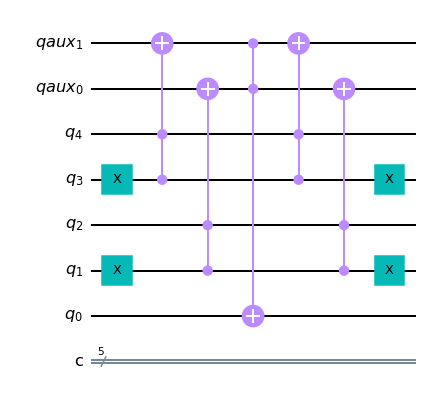

In [9]:
#
# your solution is here
#
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qaux = QuantumRegister(2,"qaux")
q = QuantumRegister(5,"q")
c = ClassicalRegister(5,"c")
qc = QuantumCircuit(q,qaux,c)

qc.x(q[3])
qc.x(q[1])
qc.ccx(q[4],q[3],qaux[1])
qc.ccx(q[2],q[1],qaux[0])
qc.ccx(qaux[1],qaux[0],q[0])
qc.ccx(q[4],q[3],qaux[1])
qc.ccx(q[2],q[1],qaux[0])
qc.x(q[3])
qc.x(q[1])

qc.draw(output="mpl",reverse_bits=True)

#### Executing this circuit on every possible inputs and verify the correctness of the implementation experimentially.

In [10]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_inputs=[]
for q4 in ['0','1']: 
    for q3 in ['0','1']:
        for q2 in ['0','1']:
            for q1 in ['0','1']:
                for q0 in ['0','1']:
                    all_inputs.append(q4+q3+q2+q1+q0)
#print(all_inputs)  

print("input --> output")
for the_input in all_inputs:
    # create the circuit
    qaux = QuantumRegister(2,"qaux")
    q = QuantumRegister(5,"q")
    c = ClassicalRegister(5,"c")
    qc = QuantumCircuit(q,qaux,c)
    # set the initial value of the circuit w.r.t. the input
    if the_input[0] =='1': qc.x(q[4])
    if the_input[1] =='1': qc.x(q[3])
    if the_input[2] =='1': qc.x(q[2])
    if the_input[3] =='1': qc.x(q[1])
    if the_input[4] =='1': qc.x(q[0])
    # implement the CCNOT gates
    qc.x(q[3])
    qc.x(q[1])
    qc.ccx(q[4],q[3],qaux[1])
    qc.ccx(q[2],q[1],qaux[0])
    qc.ccx(qaux[1],qaux[0],q[0])
    qc.ccx(q[4],q[3],qaux[1])
    qc.ccx(q[2],q[1],qaux[0])
    qc.x(q[3])
    qc.x(q[1])
    # measure the main quantum register 
    qc.measure(q,c)
    # execute the circuit
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1)
    counts = job.result().get_counts(qc)
    for key in counts: the_output = key
    printed_str = the_input[0:4]+" "+the_input[4]+" --> "+the_output[0:4]+" "+the_output[4]
    if (the_input!=the_output): printed_str = printed_str + " the output is different than the input"
    print(printed_str)

input --> output
0000 0 --> 0000 0
0000 1 --> 0000 1
0001 0 --> 0001 0
0001 1 --> 0001 1
0010 0 --> 0010 0
0010 1 --> 0010 1
0011 0 --> 0011 0
0011 1 --> 0011 1
0100 0 --> 0100 0
0100 1 --> 0100 1
0101 0 --> 0101 0
0101 1 --> 0101 1
0110 0 --> 0110 0
0110 1 --> 0110 1
0111 0 --> 0111 0
0111 1 --> 0111 1
1000 0 --> 1000 0
1000 1 --> 1000 1
1001 0 --> 1001 0
1001 1 --> 1001 1
1010 0 --> 1010 1 the output is different than the input
1010 1 --> 1010 0 the output is different than the input
1011 0 --> 1011 0
1011 1 --> 1011 1
1100 0 --> 1100 0
1100 1 --> 1100 1
1101 0 --> 1101 0
1101 1 --> 1101 1
1110 0 --> 1110 0
1110 1 --> 1110 1
1111 0 --> 1111 0
1111 1 --> 1111 1


<h3>Task 4 (extra)</h3>

Write a function taking a binary string "$ b_1 b_2 b_3 b_4$ that repeats Task 2 for the operator $ C_{b_1}C_{b_2}C_{b_3}C_{b_4}NOT $ gate, where $ b_1,\ldots,b_4$ are bits and $ NOT $ operator is applied to target qubit if the control qubits are in state $ \ket{b_1b_2b_3b_4} $.

In [11]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_inputs=[]
for q4 in ['0','1']: 
    for q3 in ['0','1']:
        for q2 in ['0','1']:
            for q1 in ['0','1']:
                for q0 in ['0','1']:
                    all_inputs.append(q4+q3+q2+q1+q0)
#print(all_inputs)  


def c4not(control_state='1111'):
    #
    # drawing the circuit
    #
    print("Control state is",control_state)
    print("Drawing the circuit:")
    qaux = QuantumRegister(2,"qaux")
    q = QuantumRegister(5,"q")
    c = ClassicalRegister(5,"c")
    qc = QuantumCircuit(q,qaux,c)

    for b in range(4):
        if control_state[b] == '0':
            qc.x(q[4-b])
    qc.ccx(q[4],q[3],qaux[1])
    qc.ccx(q[2],q[1],qaux[0])
    qc.ccx(qaux[1],qaux[0],q[0])
    qc.ccx(q[4],q[3],qaux[1])
    qc.ccx(q[2],q[1],qaux[0])
    for b in range(4):
        if control_state[b] == '0':
            qc.x(q[4-b])
            
    display(qc.draw(output="mpl",reverse_bits=True))
    
    #
    # executing the operator on all possible inputs
    #
    print("Control state is",control_state)
    print("input --> output")
    for the_input in all_inputs:
        # create the circuit
        qaux = QuantumRegister(2,"qaux")
        q = QuantumRegister(5,"q")
        c = ClassicalRegister(5,"c")
        qc = QuantumCircuit(q,qaux,c)
        # set the initial value of the circuit w.r.t. the input
        if the_input[0] =='1': qc.x(q[4])
        if the_input[1] =='1': qc.x(q[3])
        if the_input[2] =='1': qc.x(q[2])
        if the_input[3] =='1': qc.x(q[1])
        if the_input[4] =='1': qc.x(q[0])
        # implement the CCNOT gates
        for b in range(4):
            if control_state[b] == '0':
                qc.x(q[4-b])
        qc.ccx(q[4],q[3],qaux[1])
        qc.ccx(q[2],q[1],qaux[0])
        qc.ccx(qaux[1],qaux[0],q[0])
        qc.ccx(q[4],q[3],qaux[1])
        qc.ccx(q[2],q[1],qaux[0])
        for b in range(4):
            if control_state[b] == '0':
                qc.x(q[4-b])
        # measure the main quantum register 
        qc.measure(q,c)
        # execute the circuit
        job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1)
        counts = job.result().get_counts(qc)
        for key in counts: the_output = key
        printed_str = the_input[0:4]+" "+the_input[4]+" --> "+the_output[0:4]+" "+the_output[4]
        if (the_input!=the_output): printed_str = printed_str + " the output is different than the input"
        print(printed_str)

Control state is 0011
Drawing the circuit:


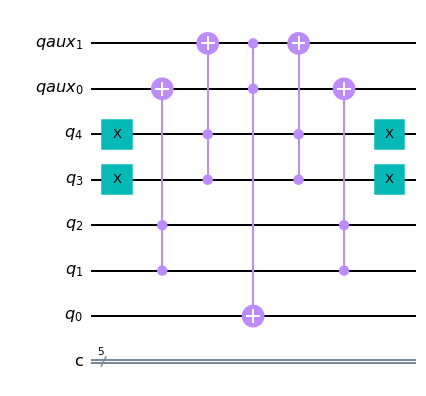

Control state is 0011
input --> output
0000 0 --> 0000 0
0000 1 --> 0000 1
0001 0 --> 0001 0
0001 1 --> 0001 1
0010 0 --> 0010 0
0010 1 --> 0010 1
0011 0 --> 0011 1 the output is different than the input
0011 1 --> 0011 0 the output is different than the input
0100 0 --> 0100 0
0100 1 --> 0100 1
0101 0 --> 0101 0
0101 1 --> 0101 1
0110 0 --> 0110 0
0110 1 --> 0110 1
0111 0 --> 0111 0
0111 1 --> 0111 1
1000 0 --> 1000 0
1000 1 --> 1000 1
1001 0 --> 1001 0
1001 1 --> 1001 1
1010 0 --> 1010 0
1010 1 --> 1010 1
1011 0 --> 1011 0
1011 1 --> 1011 1
1100 0 --> 1100 0
1100 1 --> 1100 1
1101 0 --> 1101 0
1101 1 --> 1101 1
1110 0 --> 1110 0
1110 1 --> 1110 1
1111 0 --> 1111 0
1111 1 --> 1111 1


In [12]:
# try different values

#c4not()
#c4not('1001')
c4not('0011')
#c4not('1101')
#c4not('0000')